In [1]:
import pandas as pd 
import numpy as np 
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import tqdm
import pprint as pp

from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Data/final_dummies_add.csv")

In [3]:
df.columns[:20]

Index(['bill_id', 'title', 'sponsor_title', 'sponsor_name', 'sponsor_state',
       'introduced_date', 'cosponsors', 'cosponsors_by_party', 'committees',
       'summary', 'latest_major_action_date', 'congress', 'final_status_5',
       'final_status_3', 'final_status_coms', 'division', 'new_sponsor_match',
       'sponsor_party_rank', 'sponsor_senior_party_member', 'coms_match'],
      dtype='object')

In [4]:
df.columns

Index(['bill_id', 'title', 'sponsor_title', 'sponsor_name', 'sponsor_state',
       'introduced_date', 'cosponsors', 'cosponsors_by_party', 'committees',
       'summary',
       ...
       'clean_committees_Rules and Administration', 'clean_committees_Science',
       'clean_committees_Science and Technology',
       'clean_committees_Science, Space, and Technology',
       'clean_committees_Small Business',
       'clean_committees_Small Business and Entrepreneurship',
       'clean_committees_Standards of Official Conduct',
       'clean_committees_Transportation and Infrastructure',
       'clean_committees_Ways and Means', 'law_Law'],
      dtype='object', length=123)

In [5]:
x = df.select_dtypes([int, float, bool]).drop("law_Law", axis = 1)
y = df.final_status_3

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [6]:
train = x_train.join(y_train)
train

,cosponsors,congress,sponsor_party_rank,sponsor_senior_party_member,coms_match,bipartisan,summary_length,sponsor_majority,united_congress,sponsor_pres_party_match,...,clean_committees_Rules and Administration,clean_committees_Science,clean_committees_Science and Technology,"clean_committees_Science, Space, and Technology",clean_committees_Small Business,clean_committees_Small Business and Entrepreneurship,clean_committees_Standards of Official Conduct,clean_committees_Transportation and Infrastructure,clean_committees_Ways and Means,final_status_3
15104,3,107,4,0,0,False,505,1,0,0,...,0,0,0,0,0,0,0,0,0,Referred to committee/subcommittee
66088,1,112,2,0,0,False,125,1,0,0,...,0,0,0,0,0,0,0,0,1,Referred to committee/subcommittee
106677,1,106,10,0,1,False,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Referred to committee/subcommittee
52850,2,113,7,0,1,False,857,1,0,0,...,0,0,0,0,0,0,0,0,0,Referred to committee/subcommittee
101412,2,111,26,0,0,True,172,1,1,0,...,0,0,0,0,0,0,0,1,0,Referred to committee/subcommittee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27793,30,109,5,0,1,True,9967,1,1,1,...,0,0,0,0,0,0,0,0,0,Progress made
103074,46,106,8,0,0,True,238,1,1,0,...,0,0,0,0,0,0,0,0,1,Referred to committee/subcommittee
103009,13,106,15,0,0,True,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Referred to committee/subcommittee
41593,2,105,18,0,0,False,477,1,1,0,...,0,0,0,0,0,0,0,0,0,Referred to committee/subcommittee


In [7]:
train.final_status_3.value_counts(normalize = True)

Referred to committee/subcommittee    0.824498
Progress made                         0.140575
Law                                   0.034927
Name: final_status_3, dtype: float64

In [8]:
statuses = ["Progress made", "Law"]

In [9]:
bootstrapped = []
for status in statuses:
    sample = resample(train[train['final_status_3'] == status], replace = True, n_samples = 50_000, random_state = 13)
    bootstrapped.append(sample)

In [10]:
bootstrapped = pd.concat(bootstrapped)
bootstrapped

,cosponsors,congress,sponsor_party_rank,sponsor_senior_party_member,coms_match,bipartisan,summary_length,sponsor_majority,united_congress,sponsor_pres_party_match,...,clean_committees_Rules and Administration,clean_committees_Science,clean_committees_Science and Technology,"clean_committees_Science, Space, and Technology",clean_committees_Small Business,clean_committees_Small Business and Entrepreneurship,clean_committees_Standards of Official Conduct,clean_committees_Transportation and Infrastructure,clean_committees_Ways and Means,final_status_3
74380,132,108,7,0,0,True,1497,0,1,0,...,0,0,0,0,0,0,0,0,0,Progress made
41059,3,114,11,0,1,True,430,1,1,0,...,0,0,0,0,0,0,0,0,0,Progress made
79138,5,110,11,0,0,False,2075,1,1,0,...,0,0,0,0,0,0,0,0,0,Progress made
34547,2,114,8,0,1,True,1142,1,1,0,...,0,0,0,0,0,0,0,0,0,Progress made
67131,0,112,2,0,0,False,518,1,0,0,...,0,0,0,0,0,0,0,0,0,Progress made
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80308,29,110,7,0,0,True,157,1,1,0,...,0,0,0,0,0,0,0,0,0,Law
58106,1,113,5,0,0,False,610,1,0,0,...,0,0,0,0,0,0,0,0,0,Law
25309,0,109,2,5,1,False,407,1,1,1,...,0,0,0,0,0,0,0,0,0,Law
68313,8,112,6,0,0,True,180,1,0,0,...,0,0,0,0,0,0,0,0,0,Law


In [11]:
train_samples = pd.concat([train, bootstrapped])

In [12]:
train_samples['final_status_3'].value_counts(normalize = True)

Referred to committee/subcommittee    0.377313
Progress made                         0.335517
Law                                   0.287170
Name: final_status_3, dtype: float64

In [13]:
x_train = train_samples.drop("final_status_3", axis = 1)
y_train = train_samples.final_status_3

# Feature Selection

In [15]:
# lr = LogisticRegression()

# rfe = RFECV(lr, step = 1, cv = 5, n_jobs = 4)

# rfe.fit(x_train, y_train)

# rfe.support_

# rfe.ranking_

# arr = rfe.support_
# arr = np.where(arr)[0]

# x_train_good = x_train.iloc[:, arr]

# x_test_good = x_test.iloc[:, arr]

In [16]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

print(lr.score(x_train, y_train))

print(lr.score(x_test, y_test))

preds = lr.predict(x_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6481898305084746
0.7121422222222222


In [17]:
clm = classification_report(y_test, preds)
pp.pprint(clm)

('                                    precision    recall  f1-score   support\n'
 '\n'
 '                               Law       0.16      0.67      0.26       960\n'
 '                     Progress made       0.35      0.51      0.42      3985\n'
 'Referred to committee/subcommittee       0.94      0.75      0.83     23180\n'
 '\n'
 '                          accuracy                           0.71     28125\n'
 '                         macro avg       0.49      0.64      0.50     28125\n'
 '                      weighted avg       0.83      0.71      0.76     '
 '28125\n')


# Logistic Regression

In [20]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

print(lr.score(x_train, y_train))

lr.score(x_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6481898305084746


0.7121422222222222

In [21]:
preds = lr.predict(x_test)

In [22]:
clm = classification_report(y_test, preds)
pp.pprint(clm)

('                                    precision    recall  f1-score   support\n'
 '\n'
 '                               Law       0.16      0.67      0.26       960\n'
 '                     Progress made       0.35      0.51      0.42      3985\n'
 'Referred to committee/subcommittee       0.94      0.75      0.83     23180\n'
 '\n'
 '                          accuracy                           0.71     28125\n'
 '                         macro avg       0.49      0.64      0.50     28125\n'
 '                      weighted avg       0.83      0.71      0.76     '
 '28125\n')


In [23]:
cm = confusion_matrix(y_test, preds)
cm

array([[  641,   162,   157],
       [ 1054,  2043,   888],
       [ 2246,  3589, 17345]])

In [24]:
probas = lr.predict_proba(x_test)

In [25]:
probas

array([[0.16535535, 0.27106593, 0.56357872],
       [0.00147938, 0.40399553, 0.59452509],
       [0.04527624, 0.09133516, 0.8633886 ],
       ...,
       [0.01491125, 0.44740277, 0.53768598],
       [0.42620776, 0.31951464, 0.2542776 ],
       [0.02039165, 0.76238922, 0.21721913]])

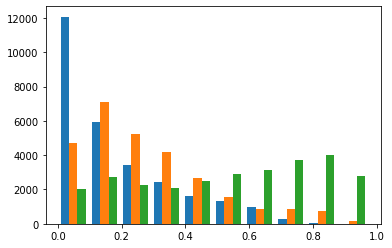

In [26]:
plt.hist(probas);

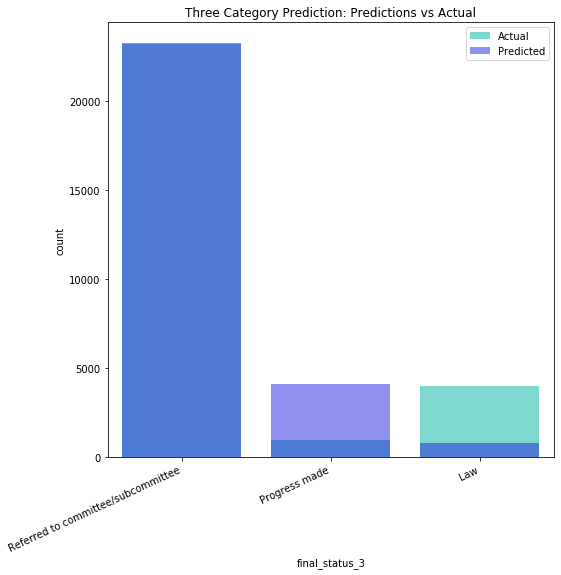

In [61]:
plt.figure(figsize= (8, 8))
plt.title("Three Category Prediction: Predictions vs Actual")
plt.xticks(rotation = 25, horizontalalignment="right") 
sns.countplot(y_test, color = "turquoise", alpha = .75, label = "Actual", orient="v")
sns.countplot(preds, color = "blue", alpha = .5, label = "Predicted", orient = "v")
plt.legend();

# Random Forest Model

In [29]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))

rf.score(x_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9954115254237288


0.8406755555555555

In [30]:
preds = rf.predict(x_test)

clm = classification_report(y_test, preds)
pp.pprint(clm)

('                                    precision    recall  f1-score   support\n'
 '\n'
 '                               Law       0.40      0.33      0.36       960\n'
 '                     Progress made       0.51      0.52      0.52      3985\n'
 'Referred to committee/subcommittee       0.91      0.92      0.92     23180\n'
 '\n'
 '                          accuracy                           0.84     28125\n'
 '                         macro avg       0.61      0.59      0.60     28125\n'
 '                      weighted avg       0.84      0.84      0.84     '
 '28125\n')


In [31]:
cm = confusion_matrix(y_test, preds)
cm

array([[  313,   311,   336],
       [  228,  2085,  1672],
       [  236,  1698, 21246]])

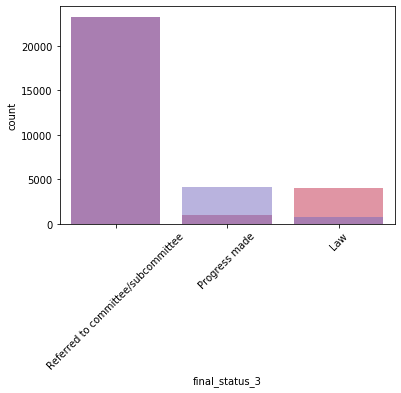

In [32]:
plt.xticks(rotation = 45)
sns.countplot(y_test, color = "crimson", alpha = .5)
sns.countplot(preds, color = "slateblue", alpha = .5);
#the model is overpredicting referred to committee. Especially bad at referred to full chamber